<a href="https://colab.research.google.com/github/RojaCM/MACHINE-LEARNING-ROJA/blob/main/MLR%20-%20Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [3]:
from google.colab import files
uploaded=files.upload()

Saving Housing.csv to Housing.csv


In [4]:
df=pd.read_csv('Housing.csv')

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [8]:
cat=df.select_dtypes(include='object')

In [9]:
cat

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [11]:
num=df.select_dtypes(exclude='object')

In [12]:
num

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [13]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


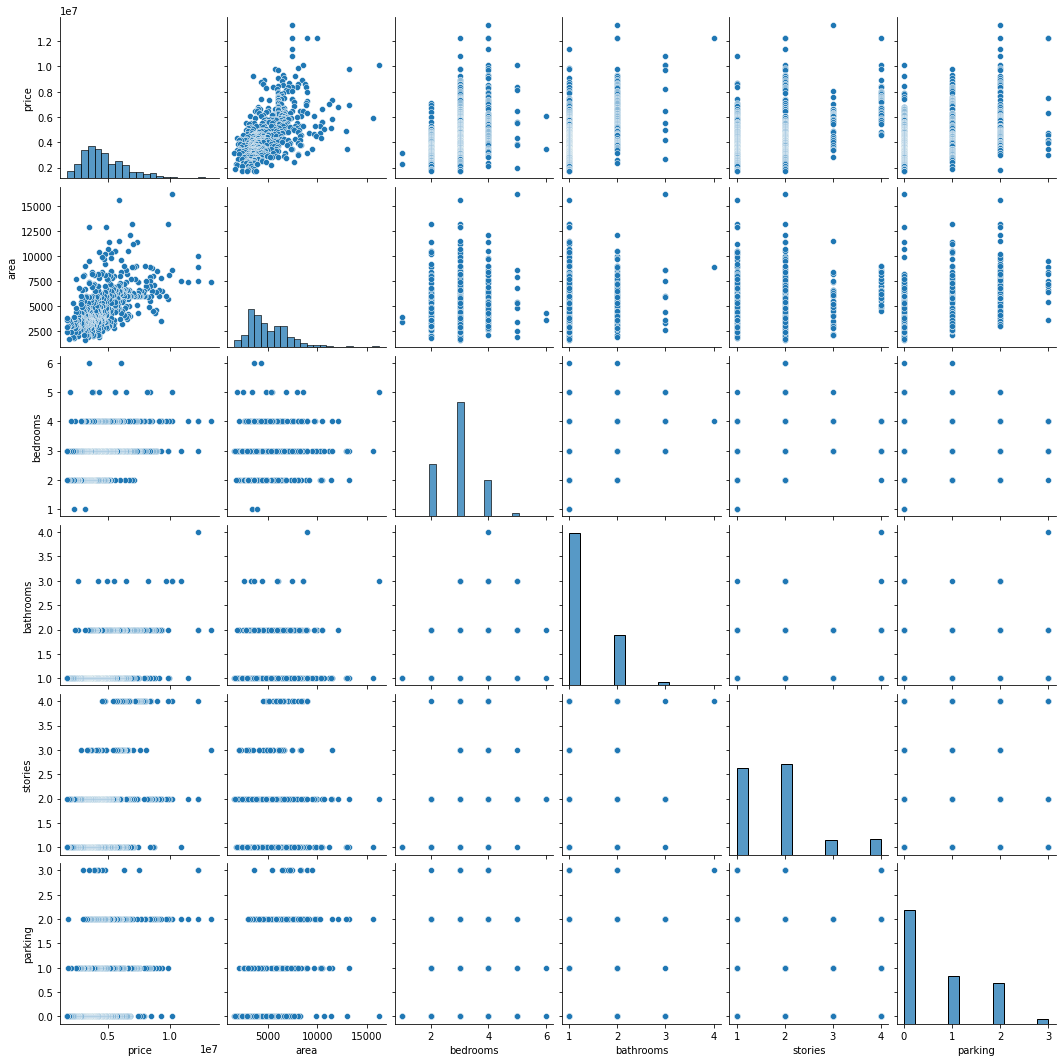

In [14]:
import seaborn as sns
sns.pairplot(df)

In [15]:
cat

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [16]:
cat.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

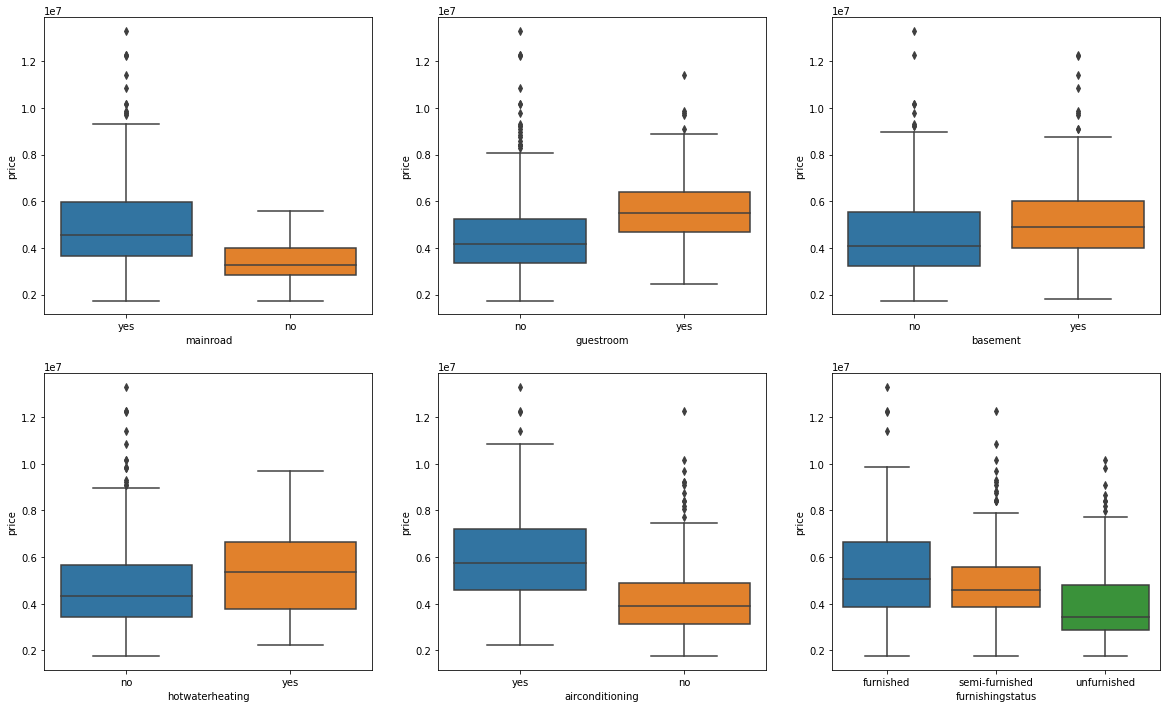

In [22]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(df.mainroad,df.price)


plt.subplot(2,3,2)
sns.boxplot(df.guestroom,df.price)


plt.subplot(2,3,3)
sns.boxplot(df.basement,df.price)


plt.subplot(2,3,4)
sns.boxplot(df.hotwaterheating,df.price)


plt.subplot(2,3,5)
sns.boxplot(df.airconditioning,df.price)


plt.subplot(2,3,6)
sns.boxplot(df.furnishingstatus,df.price)

plt.show()

Preparation of the Data for Modeling

Encoding
Converting Binary varibales to 0/1
Other Categorical variable to Dummy
Splitting ito training and test
Rescaling of variables

In [23]:
cat1=cat.copy()

In [26]:
cat1.drop('furnishingstatus',axis=1)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [28]:
varlist = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']
df[varlist]=df[varlist].apply(lambda x:x.map({'yes':1,'no':0}))

In [29]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [30]:
#Dummy variables

status=pd.get_dummies(df.furnishingstatus,drop_first=True)



In [31]:
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [33]:
df1=df.copy()

In [35]:
df=pd.concat([df,status],axis=1)

In [37]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [38]:
df.drop('furnishingstatus',axis=1,inplace=True)

In [39]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


Splitting into train and test

In [40]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.3,random_state=100)

In [43]:
df_train.shape

(381, 14)

In [44]:
df_test.shape

(164, 14)

In [45]:
df_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,2310000,3180,2,1,1,1,0,0,0,0,0,0,0,1
53,7350000,5150,3,2,4,1,0,0,0,1,2,0,1,0
350,3780000,3420,2,1,2,1,0,0,1,0,1,0,1,0
79,6650000,6000,3,2,3,1,1,0,0,1,0,0,0,0


Rescaling the Features
As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

Min-Max scaling (normalization) - Between 0 & 1
Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler=MinMaxScaler()

In [48]:
num

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [49]:
num1=num.columns

In [50]:
num1

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [51]:
df[num1]=scaler.fit_transform(df[num1])

In [53]:
df.head()
# fit(): learn xmin, xmax ~ 0.05 , 0.91, 0.05 , 0.73
# transform : x-xmin/xmax-xmin ~ 
# fit_transform

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1,0
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0,0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0,0


Training the model

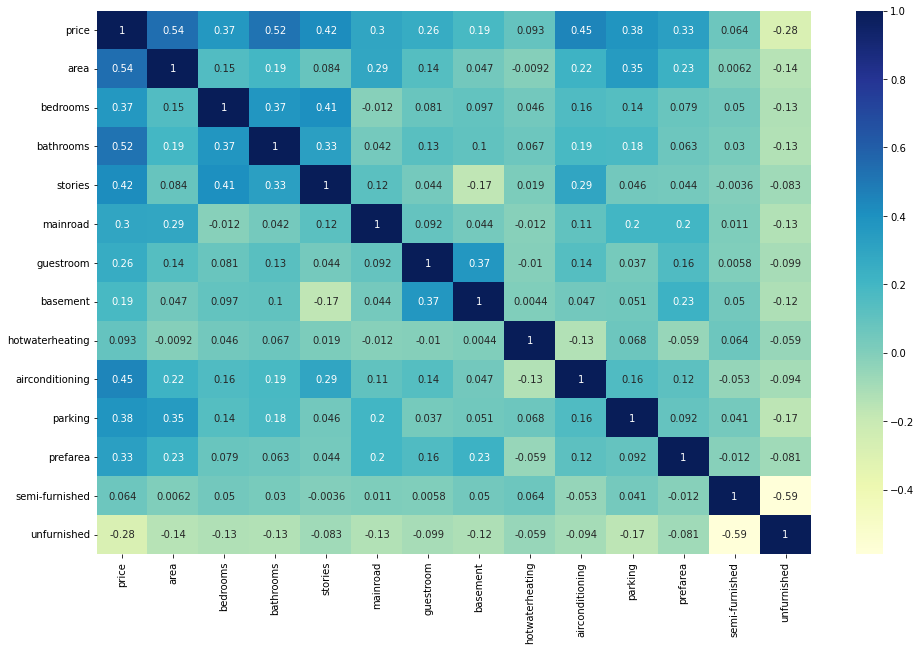

In [57]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

divide into X and Y sets

In [59]:
y_train=df_train.pop('price')

In [61]:
y_train

359    3710000
19     8855000
159    5460000
35     8080940
28     8400000
        ...   
526    2310000
53     7350000
350    3780000
79     6650000
520    2450000
Name: price, Length: 381, dtype: int64

In [64]:
x_train=df_train

Building a linear model

In [66]:
import statsmodels.api as sm

In [68]:
x_train_lm=sm.add_constant(x_train)

In [71]:
lr=sm.OLS(y_train,x_train_lm).fit()

In [72]:
lr.params

const             -8.426060e+04
area               2.385044e+02
bedrooms           1.079568e+05
bathrooms          1.102004e+06
stories            4.177852e+05
mainroad           5.825986e+05
guestroom          3.514464e+05
basement           2.494209e+05
hotwaterheating    9.801708e+05
airconditioning    7.724748e+05
parking            2.338310e+05
prefarea           6.863920e+05
semi-furnished     1.063202e+04
unfurnished       -3.581148e+05
dtype: float64

In [73]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           8.83e-83
Time:                        17:47:53   Log-Likelihood:                -5814.1
No. Observations:                 381   AIC:                         1.166e+04
Df Residuals:                     367   BIC:                         1.171e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8.426e+04   3.14e+05     -0.269      0.788   -7.01e+05    5.32e+05
area              238.5044     30.596      7.795      0.000     178.339     298.670
bedrooms          1.08e+05   8.52e+04      1.267      0.206   -5.96e+04    2.76e+05
bathrooms        1.102e+06   1.27e+05      8.679      0.000    8.52e+05    1.35e+06
stories          4.178e+05   7.38e+04      5.661      0.000    2.73e+05    5.63e+05
mainroad         5.826e+05   1.65e+05      3.520      0.000    2.57e+05    9.08e+05
guestroom        3.514e+05   1.57e+05      2.233      0.026     4.2e+04    6.61e+05
basement         2.494e+05   1.28e+05      1.943      0.053   -3043.974    5.02e+05
hotwaterheating  9.802e+05   2.49e+05      3.934      0.000     4.9e+05    1.47e+06
airconditioning  7.725e+05   1.31e+05      5.899      0.000    5.15e+05    1.03e+06
parking          2.338e+05   6.95e+04      3.365      0.001    9.72e+04     3.7e+05
prefarea         6.864e+05   1.36e+05      5.040      0.000    4.19e+05    9.54e+05
semi-furnished   1.063e+04   1.36e+05      0.078      0.938   -2.58e+05    2.79e+05
unfurnished     -3.581e+05   1.47e+05     -2.440      0.015   -6.47e+05   -6.95e+04
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                     3.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
# Check for the VIF values of the feature variables. 
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)


In [93]:
vif

,Features,VIF
1,bedrooms,16.45
2,bathrooms,9.85
0,area,8.90
3,stories,7.67
4,mainroad,7.07
11,semi-furnished,2.36
9,parking,2.10
6,basement,2.02
12,unfurnished,1.98
8,airconditioning,1.79


In [86]:
x1=x_train
for i in range(x1.shape[1]):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [88]:
x1.shape

(381, 13)

In [89]:
x1

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,7950,5,2,2,1,0,1,1,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,3180,2,1,1,1,0,0,0,0,0,0,0,1
53,5150,3,2,4,1,0,0,0,1,2,0,1,0
350,3420,2,1,2,1,0,0,1,0,1,0,1,0
79,6000,3,2,3,1,1,0,0,1,0,0,0,0


In [94]:
vif

,Features,VIF
1,bedrooms,16.45
2,bathrooms,9.85
0,area,8.90
3,stories,7.67
4,mainroad,7.07
11,semi-furnished,2.36
9,parking,2.10
6,basement,2.02
12,unfurnished,1.98
8,airconditioning,1.79


In [95]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           8.83e-83
Time:                        18:16:59   Log-Likelihood:                -5814.1
No. Observations:                 381   AIC:                         1.166e+04
Df Residuals:                     367   BIC:                         1.171e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8.426e+04   3.14e+05     -0.269      0.788   -7.01e+05    5.32e+05
area              238.5044     30.596      7.795      0.000     178.339     298.670
bedrooms          1.08e+05   8.52e+04      1.267      0.206   -5.96e+04    2.76e+05
bathrooms        1.102e+06   1.27e+05      8.679      0.000    8.52e+05    1.35e+06
stories          4.178e+05   7.38e+04      5.661      0.000    2.73e+05    5.63e+05
mainroad         5.826e+05   1.65e+05      3.520      0.000    2.57e+05    9.08e+05
guestroom        3.514e+05   1.57e+05      2.233      0.026     4.2e+04    6.61e+05
basement         2.494e+05   1.28e+05      1.943      0.053   -3043.974    5.02e+05
hotwaterheating  9.802e+05   2.49e+05      3.934      0.000     4.9e+05    1.47e+06
airconditioning  7.725e+05   1.31e+05      5.899      0.000    5.15e+05    1.03e+06
parking          2.338e+05   6.95e+04      3.365      0.001    9.72e+04     3.7e+05
prefarea         6.864e+05   1.36e+05      5.040      0.000    4.19e+05    9.54e+05
semi-furnished   1.063e+04   1.36e+05      0.078      0.938   -2.58e+05    2.79e+05
unfurnished     -3.581e+05   1.47e+05     -2.440      0.015   -6.47e+05   -6.95e+04
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                     3.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We could have

High p-value , High VIF

High - Low

1.High p , low VIF - remove these first
2.Low p, High VIF - remove these after the ones above

Low p, Low VIF

In [96]:
x_n=x_train.drop('semi-furnished',axis=1)

In [98]:
x_train_lm1=sm.add_constant(x_n)

In [101]:
lr1=sm.OLS(y_train,x_train_lm1).fit()

In [102]:
lr1.params

const             -7.570323e+04
area               2.382405e+02
bedrooms           1.079001e+05
bathrooms          1.102308e+06
stories            4.176299e+05
mainroad           5.821334e+05
guestroom          3.516635e+05
basement           2.495358e+05
hotwaterheating    9.804825e+05
airconditioning    7.715804e+05
parking            2.339282e+05
prefarea           6.862899e+05
unfurnished       -3.649157e+05
dtype: float64

In [103]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           1.07e-83
Time:                        18:26:10   Log-Likelihood:                -5814.1
No. Observations:                 381   AIC:                         1.165e+04
Df Residuals:                     368   BIC:                         1.171e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -7.57e+04   2.93e+05     -0.258      0.797   -6.53e+05    5.01e+05
area              238.2405     30.367      7.845      0.000     178.526     297.955
bedrooms         1.079e+05   8.51e+04      1.268      0.206   -5.95e+04    2.75e+05
bathrooms        1.102e+06   1.27e+05      8.697      0.000    8.53e+05    1.35e+06
stories          4.176e+05   7.37e+04      5.669      0.000    2.73e+05    5.63e+05
mainroad         5.821e+05   1.65e+05      3.524      0.000    2.57e+05    9.07e+05
guestroom        3.517e+05   1.57e+05      2.238      0.026    4.27e+04    6.61e+05
basement         2.495e+05   1.28e+05      1.946      0.052   -2568.953    5.02e+05
hotwaterheating  9.805e+05   2.49e+05      3.941      0.000    4.91e+05    1.47e+06
airconditioning  7.716e+05    1.3e+05      5.923      0.000    5.15e+05    1.03e+06
parking          2.339e+05   6.94e+04      3.372      0.001    9.75e+04     3.7e+05
prefarea         6.863e+05   1.36e+05      5.046      0.000    4.19e+05    9.54e+05
unfurnished     -3.649e+05   1.18e+05     -3.096      0.002   -5.97e+05   -1.33e+05
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                     3.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
x_n2=x_n.drop('bedrooms',axis=1)
x_train_lm2=sm.add_constant(x_n2)
lm2=sm.OLS(y_train,x_train_lm2).fit()

In [112]:
lm2.params

const              1.365251e+05
area               2.385887e+02
bathrooms          1.134671e+06
stories            4.533416e+05
mainroad           5.636214e+05
guestroom          3.476211e+05
basement           2.762429e+05
hotwaterheating    9.979557e+05
airconditioning    7.684531e+05
parking            2.420553e+05
prefarea           6.888768e+05
unfurnished       -3.732611e+05
dtype: float64

In [114]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           2.73e-84
Time:                        18:33:52   Log-Likelihood:                -5814.9
No. Observations:                 381   AIC:                         1.165e+04
Df Residuals:                     369   BIC:                         1.170e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.365e+05   2.41e+05      0.566      0.572   -3.38e+05    6.11e+05
area              238.5887     30.391      7.851      0.000     178.828     298.349
bathrooms        1.135e+06   1.24e+05      9.132      0.000     8.9e+05    1.38e+06
stories          4.533e+05   6.81e+04      6.654      0.000    3.19e+05    5.87e+05
mainroad         5.636e+05   1.65e+05      3.423      0.001     2.4e+05    8.87e+05
guestroom        3.476e+05   1.57e+05      2.211      0.028    3.85e+04    6.57e+05
basement         2.762e+05   1.27e+05      2.183      0.030    2.74e+04    5.25e+05
hotwaterheating   9.98e+05   2.49e+05      4.014      0.000    5.09e+05    1.49e+06
airconditioning  7.685e+05    1.3e+05      5.895      0.000    5.12e+05    1.02e+06
parking          2.421e+05   6.91e+04      3.501      0.001    1.06e+05    3.78e+05
prefarea         6.889e+05   1.36e+05      5.061      0.000    4.21e+05    9.57e+05
unfurnished     -3.733e+05   1.18e+05     -3.169      0.002   -6.05e+05   -1.42e+05
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                     2.76e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
# Calculate the VIF again
vif = pd.DataFrame()
vif['Features'] = x_n2.columns
vif['VIF'] = [variance_inflation_factor(x_n2.values, i) for i in range(x_n2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
0,area,8.42
1,bathrooms,7.89
3,mainroad,6.80
2,stories,5.98
8,parking,2.10
5,basement,1.91
7,airconditioning,1.76
9,prefarea,1.49
4,guestroom,1.45
10,unfurnished,1.40


In [117]:
# predict the train model
y_pred_lm=lm2.predict(x_train_lm2)

#VIF of 5 actually mean ?
5 = 1/(1-r2)

1-r2 = 1/5

r2 = 1-1/5

r2 = 0.8

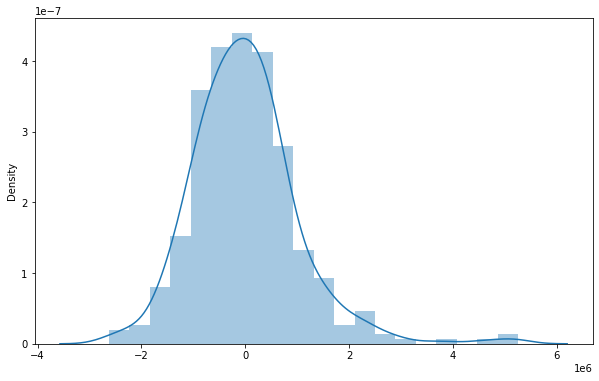

In [119]:
plt.figure(figsize=(10,6))
sns.distplot((y_train-y_pred_lm),bins=20)
plt.xlabel()

In [122]:
from sklearn.metrics import r2_score

In [123]:
r2_score(y_train,y_pred_lm)

0.6800930630265902

Now we will transform on the TEST data set

In [120]:
num_vars= ['price','area','bedrooms','bathrooms','stories', 'parking']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [121]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.245958,0.408537,0.105691,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.165518,0.147537,0.187387,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.128385,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.215636,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.323196,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.000000,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [124]:
y_test = df_test.pop('price')
X_test = df_test

In [126]:
x_test_lm=sm.add_constant(X_test)

In [128]:
x_test_lm = x_test_lm.drop(['bedrooms','semi-furnished'], axis=1) 

In [130]:
y_pred=lm2.predict(x_test_lm)

In [132]:
y_test

265    0.229697
54     0.484848
171    0.303030
244    0.242424
268    0.227879
         ...   
413    0.145455
191    0.284848
310    0.206061
46     0.500000
50     0.490909
Name: price, Length: 164, dtype: float64

In [133]:
y_pred

265    1.540157e+06
54     2.426315e+06
171    1.469850e+06
244    2.164061e+06
268    1.619768e+06
           ...     
413    1.821348e+06
191    1.475273e+06
310    9.764605e+05
46     2.380921e+06
50     1.928108e+06
Length: 164, dtype: float64